In [283]:
import pickle as pkl
with open('./resources/covid_en_tweet.pickle', 'rb') as pkl_in:
    tweets_en = pkl.load(pkl_in)
#loading bengali data
with open('./resources/covid_bn_tweet.pickle', 'rb') as pkl_in:
    tweets_bn = pkl.load(pkl_in)
with open('./resources/covid_bn_tweet_test.pickle', 'rb') as pkl_in:
    tweets_bn_test = pkl.load(pkl_in)
#loading hindi data
with open('./resources/covid_hi_tweet.pickle', 'rb') as pkl_in:
    tweets_hi = pkl.load(pkl_in)
with open('./resources/covid_hi_tweet_test.pickle', 'rb') as pkl_in:
    tweets_hi_test = pkl.load(pkl_in)

In [284]:
tweets_en.keys()

dict_keys(['text_info', 'text', 'labels'])

In [230]:
#textural features
def get_text_ft(tweets):
    text_ft = []
    len_ = tweets['text_info']['len']
    upp = tweets['text_info']['num_of_upper_char']
    qmark = tweets['text_info']['num_of_qmarks']
    exclm = tweets['text_info']['num_of_exclmmarks']
    urls = tweets['text'].apply(lambda x: x.count('URL'))
    for k, v in tweets['text_info']['len'].items():
        text_ft.append([len_[k], upp[k], qmark[k], exclm[k], urls[k]])    
    return text_ft

In [231]:
text_ft_en = get_text_ft(tweets_en)
text_ft_bn = get_text_ft(tweets_bn)
text_ft_bn_test = get_text_ft(tweets_bn_test)
tf_bn = text_ft_bn + text_ft_bn_test
text_ft_hi = get_text_ft(tweets_hi)
text_ft_hi_test = get_text_ft(tweets_hi_test)
tf_hi = text_ft_hi + text_ft_hi_test

In [102]:
len(text_ft_bn), len(text_ft_bn_test), len(text_ft_bn + text_ft_bn_test)

(380, 100, 480)

In [232]:
import pandas as pd
del tweets_en['text_info']
del tweets_bn['text_info']
del tweets_bn_test['text_info']
del tweets_hi['text_info']
del tweets_hi_test['text_info']
df_en = pd.DataFrame(tweets_en)
df_bn = pd.DataFrame(tweets_bn)
df_bn_test = pd.DataFrame(tweets_bn_test)
df_hi = pd.DataFrame(tweets_hi)
df_hi_test = pd.DataFrame(tweets_hi_test)
print(df_en)

                                                  text  labels
0    for the average american the best way to tell ...       0
1                             this is fucking bullshit       0
2    can y ’ all please just follow the government ...       0
3    no offense but the corona virus disappearing b...       0
4    this is the face of someone who just spent  9 ...       1
..                                                 ...     ...
499  president trump ' s comments about the coronav...       1
500  drug companies reportedly killed a provision i...       1
501  does @ twitter have a team fighting co vid  - ...       0
502  fox to cause pandemic  fox news is spreading  ...       1
503  nurtw lagos is already sens it i zing their pe...       1

[504 rows x 2 columns]


In [191]:
from googletrans import Translator
translator = Translator()
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

def get_translated_users(src_list, tgt_list):
    
    df_tmp = user_en_df.copy()
    change = ['no']*len(user_en_df)
    df_tmp['Change'] = change
    
    idx = []
    #idx_covered = []         #keeping unique tweets only (504 tweet's user fts not there :/)
    
    for twt in src_list: 
        translated = translator.translate(twt, dest='en').text
        max_ = -1
        tmp = 0
        tmp_twt = ''
        for i, en_twt in enumerate(tgt_list):
            if fuzz.ratio(translated, en_twt)  >= max_:
                max_ = fuzz.ratio(translated, en_twt)
                tmp = i
                tmp_twt = en_twt
        
        #print(twt, tmp_twt)
        
        #if tmp not in idx_covered:
        df_tmp.loc[df_tmp['Unnamed: 0']==tmp, ['tweet_text'] ] = twt
        df_tmp.loc[df_tmp['Unnamed: 0']==tmp, ['Change'] ] = 'yes'
        #idx_covered.append(tmp)
        
    for index, row in df_tmp.iterrows(): 
        if row['Change'] == 'no': idx.append(index)
    
    df_tmp = df_tmp.drop(idx)
    
    return df_tmp

In [367]:
from googletrans import Translator
translator = Translator()
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 
from tqdm import tqdm

def get_translated_users(src_list, tgt_list):
    
    df_dict = {}
    user_en_df = pd.read_csv('./resources/users_features.csv', index_col=0)
    user_en_df = user_en_df.rename(columns={'label': 'labels'})
    user_en_df = user_en_df.rename(columns={'tweet_text': 'text'})
    
    for col in list(user_en_df.columns):
        df_dict[col] = []
            
    for j, twt in enumerate(tqdm(src_list)): 
        translated = translator.translate(twt, dest='en').text
        max_ = 0
        tmp = 0
        tmp_twt = ''
        for i, en_twt in enumerate(tgt_list):
            if fuzz.ratio(translated, en_twt)  >= max_:
                max_ = fuzz.ratio(translated, en_twt)
                tmp = i
                tmp_twt = en_twt
        
        for col in list(user_en_df.columns):
            #print(tmp, col)
            df_dict[col].append(user_en_df.iloc[tmp][col])
        df_dict['text'][j] = twt
        
    assert len(df_dict['text']) == len(src_list)
    
    return pd.DataFrame(df_dict)

In [358]:
user_en_df.iloc[0]['tweet_text']

"For the average American the best way to tell if you have covid-19 is to cough in a rich person’s face and wait for their test results Text Feature (134 2 0 0 0 187425954568) User (124 11 7 3 0 1 4726 852 43 17544 0 3978 0 9629 0 2.42 ['Fri', 'Jun', '26', '14:01:01', '+0000', '2020'] 11.82 5.55 )"

In [368]:
#read user fts
user_en_df = pd.read_csv('./resources/users_features.csv')

user_bn_df_trans = get_translated_users(df_bn['text'].tolist(), user_en_df['tweet_text'].tolist())
user_bn_df_trans

100%|██████████| 380/380 [01:50<00:00,  3.43it/s]


,text,desc,real_name,user_handle,retweet_count,favorite_count_tweet,user_id,tweet_id,chars_in_desc,chars_in_real_name,...,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,labels
0,গড় আমেরিকানদের কাছে আপনার কোভিড -১৯ আছে কিনা ...,Cartoon Network. That @cranescomedy guy; that ...,Harry Moroz,hrmoroz,187425,954568,6.348708e+07,1.240000e+18,124,11,...,3978,0,9629,0,2.420563,"['Fri', 'Jun', '26', '14:01:01', '+0000', '2020']",1,1.821996,5.546948,0
1,এই বকশি বাজানো হয়,"it's this weird, sexual, anti-comedy comedy th...",Megan Amram,meganamram,6105,48071,3.520655e+07,1.240000e+18,75,11,...,4081,0,12916,0,3.164911,"['Thu', 'Jun', '18', '02:44:58', '+0000', '2020']",9,11.229715,276.984439,0
2,আপনি কি দয়া করে কেবলমাত্র সরকারের নির্দেশাবলী...,🤰,Merica,mrs_merica,160323,660762,6.372149e+08,1.240000e+18,1,6,...,2903,0,22287,0,7.677230,"['Sat', 'Jun', '27', '02:54:03', '+0000', '2020']",0,0.528963,1.008205,0
3,কোনও অপরাধ নয় তবে এপ্রিলের আগে সফল হওয়ার আগে...,Proverbs 31:30,Kyarra Iman🍍✨,KyarraIman_,154086,368883,1.499355e+09,1.240000e+18,14,13,...,2574,0,13653,0,5.304196,"['Fri', 'Jun', '26', '23:35:44', '+0000', '2020']",1,1.217828,1.621871,0
4,লন্ডনের আশেপাশের গুরুতর অসুস্থ কোভিড ১৯ রোগীদে...,"Anaesthetic registrar, dabbles in healthcare p...",Natalie Silvey,silv24,126506,445713,1.104535e+08,1.240000e+18,129,14,...,3799,0,112496,0,29.612003,"['Fri', 'Jun', '26', '23:36:52', '+0000', '2020']",1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"যদি এই টুইটটিতে 10 কেটি আরটি হয়, আমি লিন উপত্...",19,day,twomad,3382,18849,7.440000e+17,1.240000e+18,2,3,...,1471,1,15171,0,10.313392,"['Sat', 'Jun', '27', '04:14:51', '+0000', '2020']",0,0.707930,498.730417,0
376,আমাদের কীভাবে সম্ভাব্য covid-19 ক্ষেত্রে যোগায...,이재환: ♡ 이홍빈: how the fuck did you say that out ...,#💤,JAEHWANBLOOD,494,706,1.080000e+18,1.240000e+18,50,2,...,531,0,28504,0,53.679849,"['Sat', 'Jun', '27', '04:24:12', '+0000', '2020']",0,1.991405,2.086716,1
377,মিডিয়া কর্নাভাইরাস পেয়ে কনজারভেটিভদের উদযাপন...,Founder and Co-Chairman of @TrumpStudents / Tu...,Ryan Fournier,RyanAFournier,3337,9298,1.667517e+08,1.240000e+18,106,13,...,3636,1,13645,0,3.752750,"['Sat', 'Jun', '27', '04:11:40', '+0000', '2020']",0,2.095786,3.006738,1
378,যদি করোনা এখানে কেবলমাত্র লোকেরা পাচ্ছে তবে .....,I wear my ambition loud and proud! |Bus...,𝐂𝐚𝐤𝐞 𝐋𝐨𝐫𝐝 𝔾𝕣𝕚𝕤𝕖𝕝𝕕𝕒,MrAmbitious12,3276,2737,5.691446e+07,1.240000e+18,141,18,...,4000,0,132726,0,33.181500,"['Sat', 'Jun', '27', '04:19:39', '+0000', '2020']",0,0.589794,1.161526,0


In [393]:
#user_bn_df = pd.read_csv('./resources/Bangla_Covid_User_Features.csv')
#user_hi_df = pd.read_csv('./resources/hindi_users_annotated.csv')

user_hi_df_trans = get_translated_users(df_hi['text'].tolist(), user_en_df['tweet_text'].tolist())
user_hi_df_trans

100%|██████████| 349/349 [02:16<00:00,  2.55it/s]


,text,desc,real_name,user_handle,retweet_count,favorite_count_tweet,user_id,tweet_id,chars_in_desc,chars_in_real_name,...,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,labels
0,औसत अमेरिकी के लिए यह बताने का सबसे अच्छा तरीक...,Cartoon Network. That @cranescomedy guy; that ...,Harry Moroz,hrmoroz,187425,954568,6.348708e+07,1.240000e+18,124,11,...,3978,0,9629,0,2.420563,"['Fri', 'Jun', '26', '14:01:01', '+0000', '2020']",1,1.821996,5.546948,0
1,यह बकवास है,JACK THE HOUSE EP OUT NOW: https://t.co/m93wH...,MATRODA,matrodamusic,2546,7819,1.665141e+08,1.240000e+18,51,7,...,3636,1,781,0,0.214796,"['Fri', 'Jun', '26', '19:26:59', '+0000', '2020']",1,4.912932,82.821429,0
2,क्या आप कृपया सरकार के निर्देशों का पालन कर सक...,🤰,Merica,mrs_merica,160323,660762,6.372149e+08,1.240000e+18,1,6,...,2903,0,22287,0,7.677230,"['Sat', 'Jun', '27', '02:54:03', '+0000', '2020']",0,0.528963,1.008205,0
3,कोई अपराध नहीं है लेकिन अप्रैल से पहले गायब हो...,Proverbs 31:30,Kyarra Iman🍍✨,KyarraIman_,154086,368883,1.499355e+09,1.240000e+18,14,13,...,2574,0,13653,0,5.304196,"['Fri', 'Jun', '26', '23:35:44', '+0000', '2020']",1,1.217828,1.621871,0
4,यह किसी ऐसे व्यक्ति का चेहरा है जिसने लंदन के ...,"Anaesthetic registrar, dabbles in healthcare p...",Natalie Silvey,silv24,126506,445713,1.104535e+08,1.240000e+18,129,14,...,3799,0,112496,0,29.612003,"['Fri', 'Jun', '26', '23:36:52', '+0000', '2020']",1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,just in: राष्ट्रपति डॉटरे ने 10 मार्च से 14 मा...,"Stories, video, and multimedia for Filipinos w...",ABS-CBN News,ABSCBNNews,4899,16114,1.587242e+07,1.240000e+18,143,12,...,4333,1,793394,0,183.105008,"['Sat', 'Jun', '27', '04:20:00', '+0000', '2020']",0,0.001456,6504.308769,1
345,"breaking news: मेयर जॉय बेलमोंटे के अनुसार, qu...",News updates & breaking news from the Philippi...,ABS-CBN News Channel,ANCALERTS,3496,18368,4.472898e+07,1.240000e+18,99,20,...,4041,1,728978,0,180.395447,"['Sat', 'Jun', '27', '04:04:46', '+0000', '2020']",0,0.007453,6450.173800,1
346,"इटली में हमने एक भयानक गलती की, हर कोई कहता र...",Mostly on EU and Italian Politics | Public Aff...,Fabio Tumminello,TumminelloFabio,3470,31702,7.820000e+17,1.240000e+18,129,16,...,1366,0,2912,0,2.131772,"['Fri', 'Jun', '26', '13:18:11', '+0000', '2020']",1,1.794643,1.068268,1
347,अपने होम्स के चारों ओर एक लड़की लाएँ और अचानक ...,I'm 5 foot 16 - I also make lyrical trap chris...,850 credit score,SavRealm,3462,34978,3.223847e+09,1.240000e+18,112,16,...,1862,0,5345,0,2.870569,"['Sat', 'Jun', '27', '03:13:07', '+0000', '2020']",0,0.601871,775.862069,0


In [404]:
def convert_to_ft(df, link_score=[], bias_score=[], text_ft=[], lang='en'):
    for index, row in df.iterrows():
        #print(index, ' '.join(map(str, text_ft[index])))
        df.at[index, 'text'] = row['text']  +' Fact Check : ' + "{:.2f}".format(float(link_score[index])) 
        #+ 'User (' + str(row['chars_in_desc']) + ' ' + str(row['chars_in_real_name']) + ' ' + str(row['chars_in_user_handle']) + ' '+ str(row['num_matches']) + ' ' + str(row['total_urls_in_desc']) + ' ' + str(row['official_url_exists']) + ' ' + str(row['followers_count']) + ' ' + str(row['friends_count']) + ' ' + str(row['listed_count']) + ' ' + str(row['favourites_count']) + ' ' + str(row['geo_enabled']) + ' ' + str(row['acc_life']) + ' ' + str(row['verified']) + ' ' + str(row['num_tweets']) + ' ' + str(row['protected']) + ' ' + "{:.2f}".format(row['posting_frequency']) + ' ' + row['latest_tweet_time'] + ' ' + str(row['activity']) + "{:.2f}".format(row['avg_likes_per_tweet']) + ' ' + "{:.2f}".format(row['follower_friends_ratio']) + ' ' + ')' ' Fact Check : ' + "{:.2f}".format(link_score[index]) + ' Offense : ' + "{:.2f}".format(bias_score[index])
        #+ 'User (' + str(row['chars_in_desc']) + ' ' + str(row['chars_in_real_name']) + ' ' + str(row['chars_in_user_handle']) + ' '+ str(row['num_matches']) + ' ' + str(row['total_urls_in_desc']) + ' ' + str(row['official_url_exists']) + ' ' + str(row['followers_count']) + ' ' + str(row['friends_count']) + ' ' + str(row['listed_count']) + ' ' + str(row['favourites_count']) + ' ' + str(row['geo_enabled']) + ' ' + str(row['acc_life']) + ' ' + str(row['verified']) + ' ' + str(row['num_tweets']) + ' ' + str(row['protected']) + ' ' + "{:.2f}".format(row['posting_frequency']) + ' ' + row['latest_tweet_time'] + ' ' + str(row['activity']) + "{:.2f}".format(row['avg_likes_per_tweet']) + ' ' + "{:.2f}".format(row['follower_friends_ratio']) + ' ' + ')' 
        #+ ' Text Feature (' + ' '.join(map(str, text_ft[index])) + ' ' +str(int(row['retweet_count_tweet']))+ str(int(row['favorite_count_tweet'])) +') '
        #' Fact Check : ' + "{:.2f}".format(link_score[index])
        # ' Offense : ' + "{:.2f}".format(bias_score[index])
    new_df = df[['text', 'labels']]
    #new_df = new_df.rename(columns={'tweet_text': 'text'})
    #print(new_df)
    new_df.to_csv('./resources/'+lang+'_dataset_link.csv')

In [243]:
#eng : text + user
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, lang='en')

In [317]:
#eng : text + text ft
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, text_ft = text_ft_en, lang='en')

In [340]:
#eng : text + text_ft + user
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, text_ft = text_ft_en, lang='en')

In [303]:
user_en_df['tweet_text'].iloc[0]

'For the average American the best way to tell if you have covid-19 is to cough in a rich person’s face and wait for their test results Text Feature (134 2 0 0 0) '

In [250]:
#eng : text + link + user
en_scr = pd.read_csv('./resources/en_score.csv')
en_scr = en_scr['score'].to_list()
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, link_score = en_scr, lang='en')

In [388]:
import re
user_bn_df = pd.read_csv('./resources/Bangla_Covid_User_Features.csv', index_col=0)
user_bn_df['Has_Verifiable_Claim'] = user_bn_df['Has_Verifiable_Claim'].apply(lambda label : 1 if label == 'Yes' else 0)
user_bn_df = user_bn_df.rename(columns={'Has_Verifiable_Claim': 'labels'})
user_bn_df['tweet_text'] = user_bn_df['tweet_text'].apply(lambda x: x.lower())
url = r'http\S+'
user_bn_df['tweet_text'] = user_bn_df['tweet_text'].apply(lambda x: re.sub(url, 'URL', x, flags=re.MULTILINE))
emoji = re.compile("["         u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
                                                        
    #tweets['text_info']['emoji'] =  tweets['text'].apply(lambda x: emoji.sub(r'EMOJI', x).count('EMOJI')) 
user_bn_df['tweet_text'] = user_bn_df['tweet_text'].apply(lambda x: emoji.sub(r'', x))
user_bn_df = user_bn_df.rename(columns={'tweet_text': 'text'})
user_bn_df    

,tweet_id,text,desc,real_name,user_handle,user_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,...,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,Unnamed: 0.1,labels
0,1265499005762646022,ভারতে করোনা আক্রান্তের সংখ্যা দেড় লাখ ছাড়িয়...,"এই যুগে,খবর এখন তাৎক্ষণিক। সময়ের খবর সময়ে দেয় ...",The Wall,TheWallTweets,987325061064544256,110,8,13,3,...,0,3997,0,4.996250,"['Sun', 'Jun', '28', '15:51:15', '+0000', '2020']",0,0.001501,14.600000,0,1
1,1265496913748647937,@kolkatapolice -এ করোনা আক্রান্তের সংখ্যা ছাড়...,"Ei Samay is news of now, views of now and the ...",Ei Samay,Ei_Samay,819130177,85,8,8,3,...,1,77466,0,27.219255,"['Sun', 'Jun', '28', '16:30:05', '+0000', '2020']",0,0.000426,454.772973,1,1
2,1265494825706586113,করোনার জন্য দু'মাসের ওপর লকডাউন। সাথে আমফানের ...,Calcutta University \n\nPolitical Activist – A...,TriyashaLahiri_Aisa,TriyashaL,1252182481375281152,95,19,9,2,...,0,142,0,2.057971,"['Thu', 'Jun', '25', '07:02:02', '+0000', '2020']",3,0.711268,0.833333,2,1
3,1265494731150278656,"গর্ভবতী হওয়ার সত্বেও,\n#করোনা(covid 19) মহামা...",🇮🇳 Proud Indian🇮🇳Social Worker🧡Nation First 🧡B...,Rahul Roy,RahulRoyBJP,1091685378564730880,115,9,11,3,...,0,824,0,1.609375,"['Sun', 'Jun', '28', '15:45:24', '+0000', '2020']",0,19.967233,0.247853,3,1
4,1265493658880671745,বিমান-যাত্রীদের কোন রাজ্যে কত দিন কোয়ারেন্টাই...,"MY NAME TISHA BISWAS I AM ONLY 16 YEAR OLD, I ...",NEWS PARHO,NewsParho,1244325105880035328,117,10,9,3,...,0,3961,0,43.527473,"['Sun', 'Jun', '28', '16:57:55', '+0000', '2020']",0,0.000505,0.277778,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1265271779133710336,বুধবার ভার্চুয়াল সংবাদ সম্মেলনে আসছেন ফখরুল U...,"An interactive, new-generation multimedia news...",Deshe Bideshe,DesheBideshe,401472150,160,13,12,3,...,0,199220,0,62.964602,"['Sun', 'Jun', '28', '16:57:21', '+0000', '2020']",0,0.000000,3030.750000,95,0
95,1265269900836081664,করোনায় দেশে প্রথম আইনজীবীর মৃত্যু\nURL\n#lawy...,"An interactive, new-generation multimedia news...",Deshe Bideshe,DesheBideshe,401472150,160,13,12,3,...,0,199220,0,62.964602,"['Sun', 'Jun', '28', '16:57:21', '+0000', '2020']",0,0.000000,3030.750000,96,1
96,1265269636339126272,সামাজিক দূরত্ব নিয়ে সামাজিক মাধ্যমে ঘেউঘেউ কর...,Architect ✏📐\nWanderer 🚴🌎\nGraphics Designer 🎨...,Jack Istiac,IstiacJack,3251960594,81,11,10,2,...,0,70628,0,38.510360,"['Sun', 'Jun', '28', '16:47:04', '+0000', '2020']",0,0.067792,15.869231,97,0
97,1265269002978222080,৩০ মে খুলছে বাণিজ্যিক বিতান ও মার্কেট \nURL\n#...,"An interactive, new-generation multimedia news...",Deshe Bideshe,DesheBideshe,401472150,160,13,12,3,...,0,199220,0,62.964602,"['Sun', 'Jun', '28', '16:57:21', '+0000', '2020']",0,0.000000,3030.750000,98,1


In [391]:
user_bn_df_trans

,text,desc,real_name,user_handle,retweet_count,favorite_count_tweet,user_id,tweet_id,chars_in_desc,chars_in_real_name,...,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,labels
0,গড় আমেরিকানদের কাছে আপনার কোভিড -১৯ আছে কিনা ...,Cartoon Network. That @cranescomedy guy; that ...,Harry Moroz,hrmoroz,187425,954568,6.348708e+07,1.240000e+18,124,11,...,3978,0,9629,0,2.420563,"['Fri', 'Jun', '26', '14:01:01', '+0000', '2020']",1,1.821996,5.546948,0
1,এই বকশি বাজানো হয়,"it's this weird, sexual, anti-comedy comedy th...",Megan Amram,meganamram,6105,48071,3.520655e+07,1.240000e+18,75,11,...,4081,0,12916,0,3.164911,"['Thu', 'Jun', '18', '02:44:58', '+0000', '2020']",9,11.229715,276.984439,0
2,আপনি কি দয়া করে কেবলমাত্র সরকারের নির্দেশাবলী...,🤰,Merica,mrs_merica,160323,660762,6.372149e+08,1.240000e+18,1,6,...,2903,0,22287,0,7.677230,"['Sat', 'Jun', '27', '02:54:03', '+0000', '2020']",0,0.528963,1.008205,0
3,কোনও অপরাধ নয় তবে এপ্রিলের আগে সফল হওয়ার আগে...,Proverbs 31:30,Kyarra Iman🍍✨,KyarraIman_,154086,368883,1.499355e+09,1.240000e+18,14,13,...,2574,0,13653,0,5.304196,"['Fri', 'Jun', '26', '23:35:44', '+0000', '2020']",1,1.217828,1.621871,0
4,লন্ডনের আশেপাশের গুরুতর অসুস্থ কোভিড ১৯ রোগীদে...,"Anaesthetic registrar, dabbles in healthcare p...",Natalie Silvey,silv24,126506,445713,1.104535e+08,1.240000e+18,129,14,...,3799,0,112496,0,29.612003,"['Fri', 'Jun', '26', '23:36:52', '+0000', '2020']",1,0.233439,19.955523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"যদি এই টুইটটিতে 10 কেটি আরটি হয়, আমি লিন উপত্...",19,day,twomad,3382,18849,7.440000e+17,1.240000e+18,2,3,...,1471,1,15171,0,10.313392,"['Sat', 'Jun', '27', '04:14:51', '+0000', '2020']",0,0.707930,498.730417,0
376,আমাদের কীভাবে সম্ভাব্য covid-19 ক্ষেত্রে যোগায...,이재환: ♡ 이홍빈: how the fuck did you say that out ...,#💤,JAEHWANBLOOD,494,706,1.080000e+18,1.240000e+18,50,2,...,531,0,28504,0,53.679849,"['Sat', 'Jun', '27', '04:24:12', '+0000', '2020']",0,1.991405,2.086716,1
377,মিডিয়া কর্নাভাইরাস পেয়ে কনজারভেটিভদের উদযাপন...,Founder and Co-Chairman of @TrumpStudents / Tu...,Ryan Fournier,RyanAFournier,3337,9298,1.667517e+08,1.240000e+18,106,13,...,3636,1,13645,0,3.752750,"['Sat', 'Jun', '27', '04:11:40', '+0000', '2020']",0,2.095786,3.006738,1
378,যদি করোনা এখানে কেবলমাত্র লোকেরা পাচ্ছে তবে .....,I wear my ambition loud and proud! |Bus...,𝐂𝐚𝐤𝐞 𝐋𝐨𝐫𝐝 𝔾𝕣𝕚𝕤𝕖𝕝𝕕𝕒,MrAmbitious12,3276,2737,5.691446e+07,1.240000e+18,141,18,...,4000,0,132726,0,33.181500,"['Sat', 'Jun', '27', '04:19:39', '+0000', '2020']",0,0.589794,1.161526,0


In [392]:
#bn : text + link + user
bn_scr = pd.read_csv('./resources/bn_score.csv')
bn_scr = bn_scr['score'].to_list()
user_bn_df_trans = user_bn_df_trans.drop('retweet_count', axis=1)
user_bn_df_trans = user_bn_df_trans.drop('favorite_count_tweet', axis=1)
bn_df = pd.concat([user_bn_df_trans, user_bn_df])
bn_df.index = range(len(bn_df))
print(bn_df.head())
convert_to_ft(bn_df, link_score = en_scr, lang='bn')

                                                text  \
0  গড় আমেরিকানদের কাছে আপনার কোভিড -১৯ আছে কিনা ...   
1                                 এই বকশি বাজানো হয়   
2  আপনি কি দয়া করে কেবলমাত্র সরকারের নির্দেশাবলী...   
3  কোনও অপরাধ নয় তবে এপ্রিলের আগে সফল হওয়ার আগে...   
4  লন্ডনের আশেপাশের গুরুতর অসুস্থ কোভিড ১৯ রোগীদে...   

                                                desc       real_name  \
0  Cartoon Network. That @cranescomedy guy; that ...     Harry Moroz   
1  it's this weird, sexual, anti-comedy comedy th...     Megan Amram   
2                                                  🤰          Merica   
3                                     Proverbs 31:30   Kyarra Iman🍍✨   
4  Anaesthetic registrar, dabbles in healthcare p...  Natalie Silvey   

   user_handle       user_id      tweet_id  chars_in_desc  chars_in_real_name  \
0      hrmoroz  6.348708e+07  1.240000e+18            124                  11   
1   meganamram  3.520655e+07  1.240000e+18             75           

In [402]:
import re
user_hi_df = pd.read_csv('./resources/Hindi_Covid_User_Features.csv', index_col=0)
user_hi_df['tweet_text'] = user_hi_df['tweet_text'].apply(lambda x: x.lower())
url = r'http\S+'
user_hi_df['tweet_text'] = user_hi_df['tweet_text'].apply(lambda x: re.sub(url, 'URL', x, flags=re.MULTILINE))
emoji = re.compile("["         u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
                                                        
    #tweets['text_info']['emoji'] =  tweets['text'].apply(lambda x: emoji.sub(r'EMOJI', x).count('EMOJI')) 
user_hi_df['tweet_text'] = user_hi_df['tweet_text'].apply(lambda x: emoji.sub(r'', x))
user_hi_df = user_hi_df.rename(columns={'tweet_text': 'text'})
print(len(df_hi_test), len(user_hi_df))
df__ =  user_hi_df.head(n=105)
df__['labels'] = df_hi_test['labels'].to_list()
df__

105 291


/home/debanjana_ibm/anaconda3/envs/covidfake/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tweet_id,text,desc,real_name,user_handle,user_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,...,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,labels
0,1277229524762099713,@arshkhurana @pawankhera @arshkhurana जी हमारा...,NaN,Md. Saifullah محمد سيف الله मुहम्मद सैफ़ुल्लाह,saifullahg,203229784,0,46,10,2,...,3544,0,1115,0,0.314616,"['Sun', 'Jun', '28', '15:51:27', '+0000', '2020']",0,0.604484,0.611940,1
1,1277229518718070785,rt @navjivanindia: #maharashtra के मुख्यमंत्री...,"रिट्वीट की कोई जिम्मेदारी नही,मेरे विचार से ता...",#Now_Only_Rahulji #‏نرین کمار واٹس,CongikuttaNaren,2335191554,132,34,15,3,...,2331,0,98380,0,42.205062,"['Sun', 'Jun', '28', '16:24:59', '+0000', '2020']",0,0.754086,1.482099,1
2,1277229488665841665,#ssp_agra @ipsbablookumar के निर्देशन में\n#था...,#Police~Official Twitter account of Agra Polic...,AGRA POLICE,agrapolice,1464415993,79,11,10,1,...,2588,1,34762,0,13.431994,"['Sun', 'Jun', '28', '16:39:14', '+0000', '2020']",0,0.205656,319.892086,1
3,1277229476900827141,rt @leadernsuiup: @prithviprakas_ @nsui इस महा...,NaN,Anshu,Anshu45143352,1276833843501121537,0,5,13,2,...,1,0,433,0,433.000000,"['Sun', 'Jun', '28', '14:39:34', '+0000', '2020']",0,1.002309,0.323529,0
4,1277229470089228289,एक करोड़ से महज चंद कदम दूर कोरोना संक्रमितों ...,News website devoted to factual information an...,AFC Today,AfcTodayNews,1189913494138699778,161,9,12,3,...,241,0,1543,0,6.402490,"['Sun', 'Jun', '28', '16:53:19', '+0000', '2020']",0,0.001944,0.383333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1277227004832579586,"rt @theskindoctor13: ""centre ne dilli ke liye ...",NaN,Mukesh Surana,mukeshsurana303,1273286010399412227,0,13,15,3,...,11,0,54,0,4.909091,"['Sun', 'Jun', '28', '14:47:30', '+0000', '2020']",0,0.907407,0.000000,1
103,1277226988256673800,gautam gambhir jahan jaata h uske aaspaas se c...,"शीश झुका के प्रणाम भी करता हूँ , मुँह फट हो के...",RX100 wala Batman,RX100WalaBatman,1004845585566846976,157,17,15,4,...,752,0,20006,0,26.603723,"['Sun', 'Jun', '28', '15:17:30', '+0000', '2020']",0,0.943467,0.509434,0
104,1277226986029461504,rt @vishalcinc: इस महामारी की स्थिति में परीक्...,#NSUI #NSUIUPWest ⭐ :),Page of Prabhleen Kaur,prabhlyn,1239194166371835904,23,22,8,3,...,105,0,739,0,7.038095,"['Sun', 'Jun', '28', '13:43:33', '+0000', '2020']",0,0.163735,0.111111,1
105,1277226965624188929,rt @incuttarpradesh: इस महामारी की स्थिति में ...,@rahulgandhi @iamsrk @imVkohli\nlive for crick...,Rahul Roy,RahulRroyINC,1267782042126671874,160,9,12,4,...,26,0,13385,0,514.807692,"['Sun', 'Jun', '28', '14:22:08', '+0000', '2020']",0,0.630183,1.444444,0


In [250]:
#eng : text + link + user
en_scr = pd.read_csv('./resources/en_score.csv')
en_scr = en_scr['score'].to_list()
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, link_score = en_scr, lang='en')

In [336]:
#eng : text + link
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, link_score = en_scr, lang='en')

In [405]:
#bn : text + link
bn_scr = pd.read_csv('./resources/bn_score.csv')
bn_scr = bn_scr['score'].to_list()
bn_df = pd.concat([df_bn, df_bn_test])
bn_df.index = range(len(bn_df))
print(bn_df.head())
convert_to_ft(bn_df, link_score = bn_scr, lang='bn')

                                                text  labels
0  গড় আমেরিকানদের কাছে আপনার কোভিড -১৯ আছে কিনা ...       0
1                                 এই বকশি বাজানো হয়       0
2  আপনি কি দয়া করে কেবলমাত্র সরকারের নির্দেশাবলী...       0
3  কোনও অপরাধ নয় তবে এপ্রিলের আগে সফল হওয়ার আগে...       0
4  লন্ডনের আশেপাশের গুরুতর অসুস্থ কোভিড ১৯ রোগীদে...       1


In [357]:
#hi : text + link
hi_scr = pd.read_csv('./resources/hn_score1.csv')
hi_scr = hi_scr['score'].to_list()
hi_scr1 = pd.read_csv('./resources/hn_score.csv')
hi_scr1 = hi_scr1['score'].to_list()[:105]
hi_df = pd.concat([df_hi, df_hi_test])
hi_df.index = range(len(hi_df))
print(hi_df.head())
convert_to_ft(hi_df, link_score = hi_scr+hi_scr1, lang='hi')

                                                text  labels
0  औसत अमेरिकी के लिए यह बताने का सबसे अच्छा तरीक...       0
1                                        यह बकवास है       0
2  क्या आप कृपया सरकार के निर्देशों का पालन कर सक...       0
3  कोई अपराध नहीं है लेकिन अप्रैल से पहले गायब हो...       0
4  यह किसी ऐसे व्यक्ति का चेहरा है जिसने लंदन के ...       1


In [354]:
hi_scr1 = pd.read_csv('./resources/hn_score.csv')
hi_scr1 = hi_scr1['score'].to_list()[:105]
hi_scr1

['0',
 '0.079298309',
 '0.008577753',
 '0',
 '0.116254908',
 '0.010403422',
 '0.096796443',
 '0.010096807',
 '0.055166312',
 '0.016937543',
 '0.019873743',
 '0.024533333',
 '0.014863088',
 '0.108666624',
 '0.101837993',
 '0.012910548',
 '0',
 '0',
 '0',
 '0.034877324',
 '0.01763036',
 '0.02209866',
 '0.108666624',
 '0.019873743',
 '0.02209866',
 '0.034877324',
 '0.022844273',
 '0.034877324',
 '0.02173913',
 '0.02209866',
 '0',
 '0.02209866',
 '0.020642942',
 '0',
 '0.015366146',
 '0.02209866',
 '0.106976613',
 '0.13154506',
 '0.106976613',
 '0.16726957',
 '0.012910548',
 '0.017397697',
 '0.021156331',
 '0.02209866',
 '0.012903226',
 '0.012910548',
 '0',
 '0.034877324',
 '0.063248417',
 '0.063248417',
 '0.092033297',
 '0.02209866',
 '0.02209866',
 '0',
 '0',
 '0.015688659',
 '0.026403941',
 '0.018068966',
 '0.046604567',
 '0.093782713',
 '0.02209866',
 '0.101222289',
 '0',
 '0.02209866',
 '0',
 '0.027339936',
 '0',
 '0.038134058',
 '0.024754346',
 '0.034877324',
 '0.015419602',
 '0.0916

In [252]:
#eng : text + user + bias
user_en_df = pd.read_csv('./resources/users_features.csv')
with open('./resources/profanity_scores.pickle', 'rb') as pkl_in:
    pscores = pkl.load(pkl_in)
pscores = pscores[:len(user_en_df)]
convert_to_ft(user_en_df, bias_score = pscores, lang='en')

In [338]:
#eng : text + bias
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, bias_score = pscores, lang='en')

In [328]:
#eng : text + link + bias
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, link_score = en_scr, bias_score = pscores, lang='en')

In [255]:
#eng : text + user + link + bias
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, link_score = en_scr, bias_score = pscores, lang='en')

In [320]:
#eng : text + textft + user + link + bias
user_en_df = pd.read_csv('./resources/users_features.csv')
convert_to_ft(user_en_df, text_ft = text_ft_en, link_score = en_scr, bias_score = pscores, lang='en')

In [264]:
tweets_en['text_info']['len']

0      134
1       24
2      218
3       72
4      292
      ... 
499    247
500    275
501    273
502    278
503    237
Name: text, Length: 504, dtype: int64

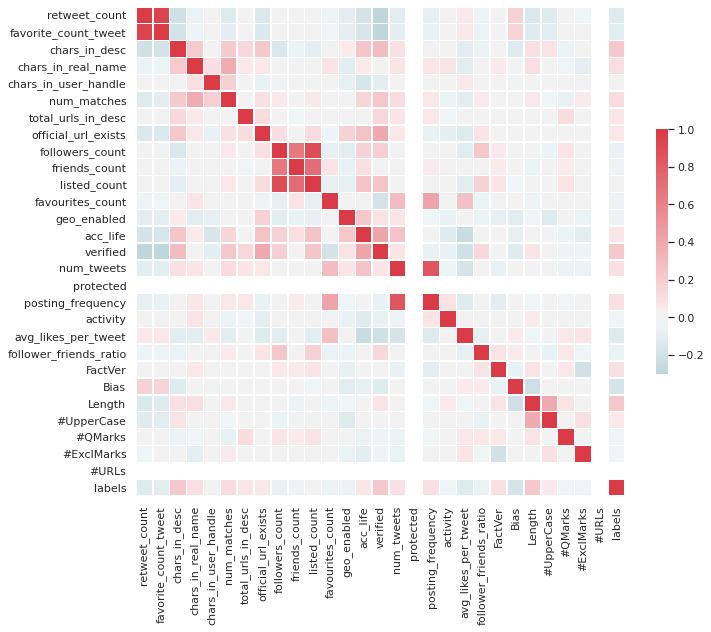

In [342]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
d = pd.read_csv('./resources/users_features.csv', index_col=0)

d['FactVer'] = en_scr[:len(d)]
d['Bias'] = pscores
d['Length'] = tweets_en['text_info']['len']
d['#UpperCase'] = tweets_en['text_info']['num_of_upper_char']
d['#QMarks'] = tweets_en['text_info']['num_of_qmarks']
d['#ExclMarks'] = tweets_en['text_info']['num_of_exclmmarks']
d['#URLs'] = tweets_en['text'].apply(lambda x: x.count('URL'))
d['labels'] = d['label']
d = d.drop('label', axis=1)
d = d.drop('user_id', axis=1)
d = d.drop('tweet_id', axis=1)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot = sns.heatmap(corr, cmap=cmap, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure()

plot.savefig("./outputs/correlation.png")